In [1]:
from scipy import stats
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.
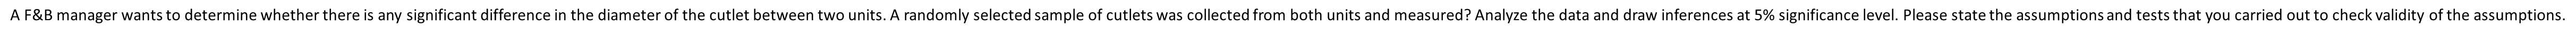

In [2]:
cutlets = pd.read_csv(r'C:/Users/HP/Desktop/AI_Data_science/Data_sci/Assignmets/Hypothesis/Cutlets.csv')

In [3]:
cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [4]:
cutlets['Unit A'].mean()

7.01909142857143

In [5]:
cutlets['Unit B'].mean()

6.964297142857142

In [6]:
ttest ,p_value= stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'])

In [7]:
if p_value < 0.05:
    print(' Rejecting null hypothesis or accepting alternative one')
else:
    print('Accepting null hypothesis')

Accepting null hypothesis


In [8]:
print('ttest:{}  p_valuse:{}'.format(ttest,p_value))

ttest:0.7228688704678061  p_valuse:0.47223947245995


#    A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
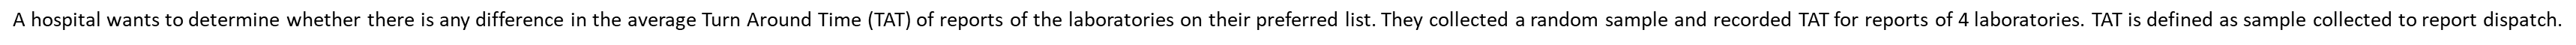

In [9]:
tat=pd.read_csv(r'C:/Users/HP/Desktop/AI_Data_science/Data_sci/Assignmets/Hypothesis/LabTAT.csv')

In [10]:
tat

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [25]:
tat['Laboratory 1']

0      185.35
1      170.49
2      192.77
3      177.33
4      193.41
        ...  
115    178.49
116    176.08
117    202.48
118    182.40
119    182.09
Name: Laboratory 1, Length: 120, dtype: float64

In [19]:
import scipy as sp
model=sp.stats.f_oneway(tat['Laboratory 1'],tat['Laboratory 2'],tat['Laboratory 3'],tat['Laboratory 4'])

In [20]:
tat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


<AxesSubplot:xlabel='Laboratory 4'>

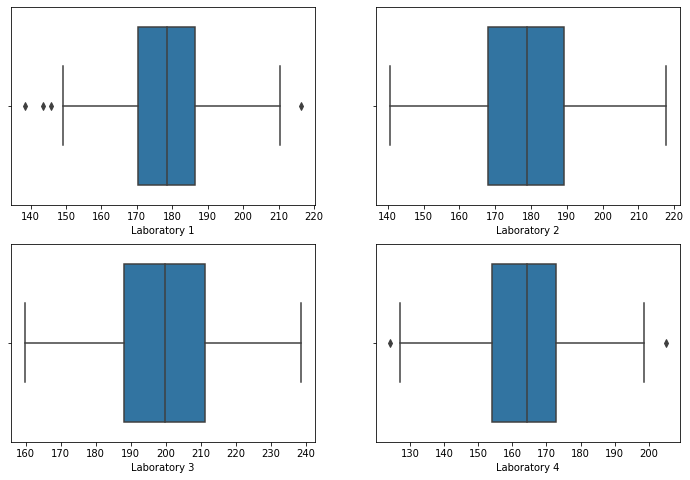

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(tat['Laboratory 1'])
#plt.title('Laboratory 1')
plt.subplot(222)
sns.boxplot(tat['Laboratory 2'])
#plt.title('Laboratory 2')
plt.subplot(223)
sns.boxplot(tat['Laboratory 3'])
#plt.title('Laboratory 3')
plt.subplot(224)
sns.boxplot(tat['Laboratory 4'])
#plt.title('Laboratory 4')

In [22]:
model.statistic

118.70421654401437

In [23]:
model.pvalue

2.1156708949992414e-57

In [24]:
if model.pvalue < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we reject null hypothesis


In [27]:
from scipy.stats import f_oneway
f_oneway(tat['Laboratory 1'],tat['Laboratory 2'],tat['Laboratory 3'],tat['Laboratory 4'])


F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

# Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.


In [28]:
BuyerRatio =pd.read_csv('BuyerRatio.csv')
BuyerRatio.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [29]:
BuyerRatio.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [30]:
East=BuyerRatio['East'].mean()
West=BuyerRatio['West'].mean()
North=BuyerRatio['North'].mean()
South=BuyerRatio['South'].mean()

print('East Mean = ',East)
print('West Mean = ',West)
print('North Mean = ',North)
print('South Mean = ',South)

East Mean =  242.5
West Mean =  832.5
North Mean =  743.5
South Mean =  410.0


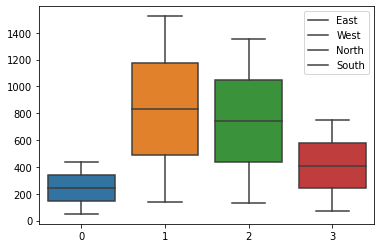

In [33]:
sns.boxplot(data=[BuyerRatio['East'],BuyerRatio['West'],BuyerRatio['North'],BuyerRatio['South']],)
plt.legend(['East','West','North','South'])

In [35]:
alpha=0.05
Male = [50,142,131,70]
Female=[435,1523,1356,750]
Sales=[Male,Female]
print(Sales)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [36]:
chiStats = sp.stats.chi2_contingency(Sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

Test t=1.595946 p-value=0.660309
Interpret by p-Value
we accept null hypothesis


In [37]:
#critical value = 0.1
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])# Find the critical value for 95% confidence*
                      #degree of freedom

observed_chi_val = chiStats[0]
#if observed chi-square < critical chi-square, then variables are not related
#if observed chi-square > critical chi-square, then variables are not independent (and hence may be related).
print('Interpret by critical value')
if observed_chi_val <= critical_value:
    # observed value is not in critical area therefore we accept null hypothesis
    print ('Null hypothesis cannot be rejected (variables are not related)')
else:
    # observed value is in critical area therefore we reject null hypothesis
    print ('Null hypothesis cannot be excepted (variables are not independent)')

Interpret by critical value
Null hypothesis cannot be rejected (variables are not related)


# TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [38]:
Customer = pd.read_csv('Costomer+OrderForm.csv')
Customer.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [39]:
Customer.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [40]:
Phillippines_value=Customer['Phillippines'].value_counts()
Indonesia_value=Customer['Indonesia'].value_counts()
Malta_value=Customer['Malta'].value_counts()
India_value=Customer['India'].value_counts()
print(Phillippines_value)
print(Indonesia_value)
print(Malta_value)
print(India_value)

Error Free    271
Defective      29
Name: Phillippines, dtype: int64
Error Free    267
Defective      33
Name: Indonesia, dtype: int64
Error Free    269
Defective      31
Name: Malta, dtype: int64
Error Free    280
Defective      20
Name: India, dtype: int64


In [41]:
chiStats = sp.stats.chi2_contingency([[271,267,269,280],[29,33,31,20]])
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

Test t=3.858961 p-value=0.277102
Interpret by p-Value
we accept null hypothesis


In [42]:
#critical value = 0.1
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
observed_chi_val = chiStats[0]
print('Interpret by critical value')
if observed_chi_val <= critical_value:
       print ('Null hypothesis cannot be rejected (variables are not related)')
else:
       print ('Null hypothesis cannot be excepted (variables are not independent)')

Interpret by critical value
Null hypothesis cannot be rejected (variables are not related)
